In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
import seaborn as sns

import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

In [2]:
PATH = "/wynton/group/ahituv/fongsl/projects/CRISPR_nullomer_MPRA/results/null_count"
RE = os.path.join(PATH, "eda")
try:
    os.mkdir(RE)
except:
    print("dir exists", RE)
os.chdir(PATH)
counts = glob.glob( "./*.tsv")

dir exists /wynton/group/ahituv/fongsl/projects/CRISPR_nullomer_MPRA/results/null_count/eda


In [3]:
counts

['./null.master.table.noNa_STATS.tsv',
 './allreps.tsv',
 './average_allreps.tsv',
 './null_1_counts.tsv',
 './null_2_counts.tsv',
 './null_3_counts.tsv',
 './null.master.table.noNa.tsv']

## read data

In [17]:
results = {}
collect_ids = set()
for c in counts:
    if "counts" in c:
        df = pd.read_csv(c, sep='\t')
        df = df.loc[df["name"]!= "no_BC"]
        
        collect_ids = collect_ids.union(df["name"]) # collect all sequence names for final dataframe
        rep = (c.split("/")[1]).split("_")[1]
        
        #df.columns = numberCols(df, rep) # rename the columns
        df["rep"] = int(rep)
        
        results[c] = df
        

## combine all data

In [18]:
all = pd.concat(results.values()) # long form data

## filter barcodes >=10

In [19]:
print("before filtering bc count", all.shape)
filtered=all.loc[all["n_obs_bc"]>=10].copy() # filter for barcodes
print("after filtering bc count", filtered.shape)

before filtering bc count (328179, 9)
after filtering bc count (307050, 9)


## make table

In [20]:
filtered

,name,dna_count,rna_count,ratio,log2,rna_sum,dna_sum,n_obs_bc,rep
1,15-firstorder.1403527|HepG2_DNasePeakNoPromote...,0.183641,0.239997,1.306884,0.386131,158,220,181,1
2,15-firstorder.2228963|HepG2_DNasePeakNoPromote...,0.178730,0.183142,1.024685,0.035180,21,38,32,1
3,15-firstorder.1669995|HepG2_DNasePeakNoPromote...,0.255682,0.039527,0.154595,-2.693438,19,234,138,1
4,15-firstorder.2107088|HepG2_DNasePeakNoPromote...,0.175626,0.079756,0.454122,-1.138849,8,35,30,1
5,15-firstorder.133756|WTC11_seq60302_F|active,0.155935,0.206391,1.323571,0.404435,144,198,192,1
...,...,...,...,...,...,...,...,...,...
109372,15-firstorder.1669995|HepG2_DNasePeakNoPromote...,0.032192,0.072904,2.264626,1.179273,52,0,17,3
109374,15-firstorder.2307186|WTC11_seq30653_F|active,0.036216,0.060352,1.666423,0.736755,38,0,15,3
109378,15-firstorder.1070721|WTC11_seq20905_F|inactive,0.038631,0.039616,1.025491,0.036315,23,0,14,3
109394,15-firstorder.715390|HepG2_DNasePeakNoPromoter...,0.041390,0.054825,1.324593,0.405549,30,0,13,3


## how many reads have zero DNA counts? 

In [27]:
filtered.loc[filtered["dna_sum"]>10].shape

(238257, 9)

In [28]:
filtered.loc[filtered["dna_sum"]>10].describe() # not possible that RNA is expressed without DNA barcodes... 

,dna_count,rna_count,ratio,log2,rna_sum,dna_sum,n_obs_bc,rep
count,238257.000000,238257.000000,238257.000000,238257.000000,238257.000000,238257.000000,238257.000000,238257.000000
mean,0.204765,0.136508,0.780972,-0.791306,139.005301,38.447051,58.125872,1.807792
std,0.084059,0.097720,0.687964,1.123678,489.178188,34.653442,48.824151,0.796158
min,0.030217,0.006389,0.026713,-5.226312,0.000000,11.000000,10.000000,1.000000
25%,0.147146,0.063743,0.311805,-1.681285,9.000000,17.000000,26.000000,1.000000
50%,0.184261,0.112741,0.576265,-0.795197,22.000000,27.000000,43.000000,2.000000
75%,0.247473,0.183142,1.063472,0.088783,84.000000,47.000000,74.000000,2.000000
max,0.647671,1.232251,11.352508,3.504939,23117.000000,667.000000,830.000000,3.000000


In [23]:
filtered.loc[filtered["rna_sum"]==0] # possible that RNA is not expressed, despite DNA barcode being present. 

,name,dna_count,rna_count,ratio,log2,rna_sum,dna_sum,n_obs_bc,rep
460,15-firstorder.1070542|K562_peak1327|inactive,0.191562,0.018314,0.095605,-3.386777,0,18,14,1
534,15-firstorder.1880067|WTC11_seq29434_F|inactive,0.229875,0.010989,0.047802,-4.386777,0,37,24,1
741,15-firstorder.2228963|HepG2_DNasePeakNoPromote...,0.214247,0.022893,0.106852,-3.226312,0,16,11,1
939,15-firstorder.207792|K562_peak74840|inactive,0.170138,0.017170,0.100916,-3.308774,0,17,15,1
1393,15-firstorder.1313780|HepG2_DNasePeakNoPromote...,0.207946,0.017170,0.082568,-3.598281,0,21,15,1
...,...,...,...,...,...,...,...,...,...
102517,15-firstorder.363886|K562_peak82602|inactive,0.374967,0.021474,0.057270,-4.126070,0,13,13,2
102948,endog-scramble-1|WTC11_seq34601_F,0.374967,0.027331,0.072889,-3.778147,0,10,10,2
103960,15-firstorder.1509984|HepG2_DNasePeakNoPromote...,0.511319,0.027331,0.053452,-4.225606,0,14,10,2
104241,15-firstorder.1458428|HepG2_DNasePeakNoPromote...,0.443143,0.027331,0.061676,-4.019155,0,12,10,2


In [26]:
filtered.loc[filtered["rna_sum"]==0].describe()

,dna_count,rna_count,ratio,log2,rna_sum,dna_sum,n_obs_bc,rep
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,0.253404,0.019318,0.084626,-3.662811,0.0,18.871129,14.785215,1.251748
std,0.106908,0.005015,0.030827,0.548163,0.0,7.665140,5.141091,0.434234
min,0.151233,0.006389,0.026713,-5.226312,0.0,10.000000,10.000000,1.000000
25%,0.179590,0.015262,0.060550,-4.045740,0.0,14.000000,11.000000,1.000000
50%,0.201645,0.019622,0.078978,-3.662411,0.0,17.000000,13.000000,1.000000
75%,0.374967,0.022893,0.106852,-3.226312,0.0,22.000000,17.000000,2.000000
max,0.647671,0.027331,0.165135,-2.598281,0.0,67.000000,42.000000,2.000000


In [15]:
pd.pivot(filtered.loc[filtered["dna_sum"]==0], columns = "rep", index="name", values = filtered.columns[1:5])

dna_count           rna_count  \
rep                                                     2         3         2   
name                                                                            
15-firstorder.1017843|WTC11_seq40506_F|inactive       NaN  0.041390       NaN   
15-firstorder.1017843|WTC11_seq49094_F|active         NaN  0.028973       NaN   
15-firstorder.1017843|WTC11_seq71658_F|active         NaN  0.041390       NaN   
15-firstorder.1018034|WTC11_seq27360_F|active         NaN  0.036216       NaN   
15-firstorder.1018034|WTC11_seq37943_F|active         NaN  0.015661       NaN   
...                                                   ...       ...       ...   
concat-95|WTC11_seq8625_F|inactive                    NaN  0.030498       NaN   
endog-scramble-0|HepG2_DNasePeakNoPromoter40161       NaN  0.052678       NaN   
endog-scramble-0|K562_peak8806                        NaN  0.036216       NaN   
endog-scramble-1|K562_peak74840                       NaN  0.041390       NaN   
endog-scramble-1|WTC11_seq58732_F                     NaN  0.032192       NaN   

                                                          ratio            \
rep                                                     3     2         3   
name                                                                        
15-firstorder.1017843|WTC11_seq40506_F|inactive  0.045982   NaN  1.110949   
15-firstorder.1017843|WTC11_seq49094_F|active    0.107705   NaN  3.717406   
15-firstorder.1017843|WTC11_seq71658_F|active    0.097270   NaN  2.350084   
15-firstorder.1018034|WTC11_seq27360_F|active    0.064994   NaN  1.794610   
15-firstorder.1018034|WTC11_seq37943_F|active    0.052196   NaN  3.332846   
...                                                   ...   ...       ...   
concat-95|WTC11_seq8625_F|inactive               0.036488   NaN  1.196406   
endog-scramble-0|HepG2_DNasePeakNoPromoter40161  0.038265   NaN  0.726390   
endog-scramble-0|K562_peak8806                   0.040235   NaN  1.110949   
endog-scramble-1|K562_peak74840                  0.044214   NaN  1.068220   
endog-scramble-1|WTC11_seq58732_F                0.090786   NaN  2.820101   

                                                log2            
rep                                                2         3  
name                                                            
15-firstorder.1017843|WTC11_seq40506_F|inactive  NaN  0.151792  
15-firstorder.1017843|WTC11_seq49094_F|active    NaN  1.894296  
15-firstorder.1017843|WTC11_seq71658_F|active    NaN  1.232712  
15-firstorder.1018034|WTC11_seq27360_F|active    NaN  0.843670  
15-firstorder.1018034|WTC11_seq37943_F|active    NaN  1.736755  
...                                              ...       ...  
concat-95|WTC11_seq8625_F|inactive               NaN  0.258708  
endog-scramble-0|HepG2_DNasePeakNoPromoter40161  NaN -0.461185  
endog-scramble-0|K562_peak8806                   NaN  0.151792  
endog-scramble-1|K562_peak74840                  NaN  0.095209  
endog-scramble-1|WTC11_seq58732_F                NaN  1.495747  

[801 rows x 8 columns]

## make table

In [14]:
table = pd.pivot(filtered.loc[filtered["dna_sum"]==0], columns = "rep", index="name", values = filtered.columns[1:5])
table = pd.pivot(filtered, columns = "rep", index="name", values = filtered.columns[1:5])

### 
#cleanup
### 

# drop sequences with < 3 reps
table = table.dropna() 
print("keep only oligos w/ all replicates", table.shape)

# reset index
table.reset_index(inplace=True)

# annotate sequence features
table["activity"] = table["name"].apply(lambda x: x.split("|")[-1])
table["peak"] = table["name"].apply(lambda x: x.split("|")[1])

table["type"] = table["name"].apply(lambda x: x.split("|")[0])

table

keep only oligos w/ all replicates (0, 8)


Empty DataFrame
Columns: [(name, ), (dna_count, 2), (dna_count, 3), (rna_count, 2), (rna_count, 3), (ratio, 2), (ratio, 3), (log2, 2), (log2, 3), (activity, ), (peak, ), (type, )]
Index: []

In [52]:
# keep only l2 measurements
l2 = table.set_index('name')["log2"].copy()

l2.columns = l2.columns.get_level_values(0) # flatten log2 levels
l2.reset_index(inplace=True)

In [53]:
# prepare table meta-info for merging
table_names = table[["name", "type", "activity", "peak"]].copy()
table_names.columns = table_names.columns.get_level_values(0) # flatten table levels
table_names

,name,type,activity,peak
0,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,15-firstorder.1017843,active,HepG2_DNasePeakNoPromoter10535
1,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,15-firstorder.1017843,active,HepG2_DNasePeakNoPromoter10586
2,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,15-firstorder.1017843,inactive,HepG2_DNasePeakNoPromoter10714
3,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,15-firstorder.1017843,inactive,HepG2_DNasePeakNoPromoter10849
4,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,15-firstorder.1017843,active,HepG2_DNasePeakNoPromoter11263
...,...,...,...,...
94122,endog|WTC11_seq81074_F|active,endog,active,WTC11_seq81074_F
94123,endog|WTC11_seq81658_F|active,endog,active,WTC11_seq81658_F
94124,endog|WTC11_seq82616_F|active,endog,active,WTC11_seq82616_F
94125,endog|WTC11_seq83107_F|active,endog,active,WTC11_seq83107_F


In [54]:
# add back sequecne info
# merge together
l2 = pd.merge(l2,table_names).copy()

In [58]:
def labelOligos(df):
    """function to rename oligo nucleotide by concat, endog, scramble, and nullomer labels"""
    df["label"] = None
    df.loc[df["type"].str.contains("concat"), "label"] = "concat"
    df.loc[df["type"].str.contains("endog"), "label"] = "endog"
    df.loc[df["type"].str.contains("scramble"), "label"] = "scramble"
    df.loc[df["type"].str.contains("first"), "label"] = "nullo"

    df["active"] = None
    df.loc[df["activity"]=="active", "active"] = 'active'
    df.loc[df["activity"]=="inactive", "active"] = 'inactive'
    df.loc[df["activity"].str.contains(":"), "active"] = 'syn'
    df.loc[df["activity"].str.contains("controlhigh"), "active"] = 'ctrlhigh'

    df["cl.origin"] = None
    df.loc[df["name"].str.contains(":"), "cl.origin"] = 'syn'
    df.loc[df["name"].str.contains("K562"), "cl.origin"] = 'k562'
    df.loc[df["name"].str.contains("HepG2"), "cl.origin"] = 'hepg2'
    df.loc[df["name"].str.contains("WTC11"), "cl.origin"] = 'wtc11'

    return df

In [63]:
l2["mean"] = l2[["1", "2", "3"]].mean(axis=1) #compute mean
l2 = labelOligos(l2)
l2

,name,1,2,3,type,activity,peak,mean,label,active,cl.origin
0,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,0.691226,-0.511360,-1.289913,15-firstorder.1017843,active,HepG2_DNasePeakNoPromoter10535,-0.370016,nullo,active,hepg2
1,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,0.144944,-0.821215,-0.141144,15-firstorder.1017843,active,HepG2_DNasePeakNoPromoter10586,-0.272472,nullo,active,hepg2
2,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,-2.102324,-1.640643,-0.437139,15-firstorder.1017843,inactive,HepG2_DNasePeakNoPromoter10714,-1.393369,nullo,inactive,hepg2
3,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,-2.553887,-1.903678,-0.411144,15-firstorder.1017843,inactive,HepG2_DNasePeakNoPromoter10849,-1.622903,nullo,inactive,hepg2
4,15-firstorder.1017843|HepG2_DNasePeakNoPromote...,0.598116,0.626837,0.411123,15-firstorder.1017843,active,HepG2_DNasePeakNoPromoter11263,0.545359,nullo,active,hepg2
...,...,...,...,...,...,...,...,...,...,...,...
94122,endog|WTC11_seq81074_F|active,-0.043990,-0.511360,0.032667,endog,active,WTC11_seq81074_F,-0.174228,endog,active,wtc11
94123,endog|WTC11_seq81658_F|active,0.241895,0.324128,0.590904,endog,active,WTC11_seq81658_F,0.385642,endog,active,wtc11
94124,endog|WTC11_seq82616_F|active,0.346577,0.359357,0.358243,endog,active,WTC11_seq82616_F,0.354726,endog,active,wtc11
94125,endog|WTC11_seq83107_F|active,0.621685,0.516898,0.880664,endog,active,WTC11_seq83107_F,0.673082,endog,active,wtc11


In [64]:
controls = l2.loc[l2["activity"].str.contains(":")].copy()
exp = l2.loc[~l2["activity"].str.contains(":")].copy()

In [65]:
controls.shape

(286, 11)

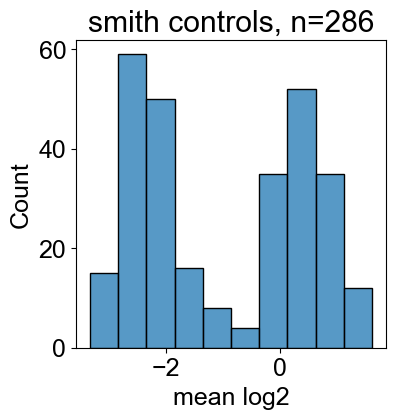

In [66]:
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(x="mean", data=controls, ax=ax)
ax.set(xlabel="mean log2", 
      title=f"smith controls, n={controls.shape[0]}")

out = os.path.join(RE, "ctrl.hist.pdf")
plt.savefig(out, bbox_inches="tight")

In [67]:
exp["label"].describe()

count     93798
unique        4
top       nullo
freq      92358
Name: label, dtype: object

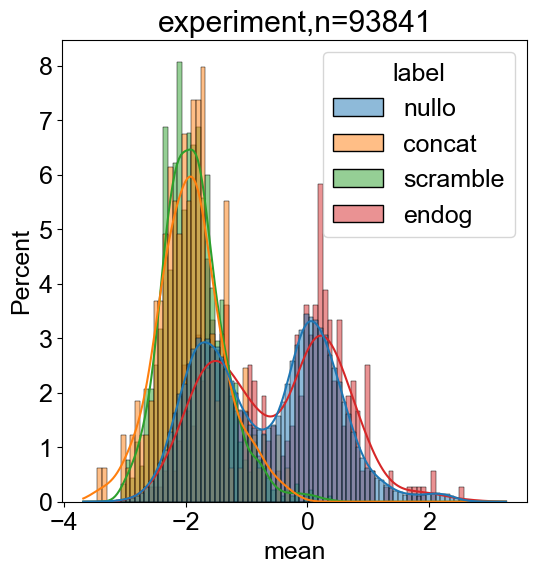

In [68]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(x="mean", hue = "label", 
             data=exp, #.sample(n=1000), 
             stat="percent", common_norm=False, 
             kde=True, ax=ax
            )
ax.set(title=f'experiment,n={exp.shape[0]}')
#ax.legend(bbox_to_anchor=(1,1), frameon=False)
out = os.path.join(RE, "exp.hist.pdf")

plt.savefig(out, bbox_inches="tight")

In [69]:
exp.groupby('label')["mean"].describe().T.round(2)

label,concat,endog,nullo,scramble
count,163.00,360.00,92358.00,917.00
mean,-1.91,-0.51,-0.66,-1.87
std,0.55,1.02,1.05,0.50
min,-3.42,-2.54,-3.68,-3.04
25%,-2.25,-1.45,-1.59,-2.20
50%,-1.95,-0.35,-0.57,-1.91
75%,-1.65,0.28,0.17,-1.60
max,-0.29,2.54,3.26,0.36


In [71]:
exp.groupby(["active"])["mean"].describe().T.round(2)

active,active,ctrlhigh,inactive
count,48022.00,43.00,44859.00
mean,0.20,-1.49,-1.58
std,0.59,0.87,0.52
min,-1.89,-2.66,-3.68
25%,-0.16,-2.18,-1.93
50%,0.15,-1.70,-1.61
75%,0.50,-0.99,-1.26
max,3.26,1.59,2.59


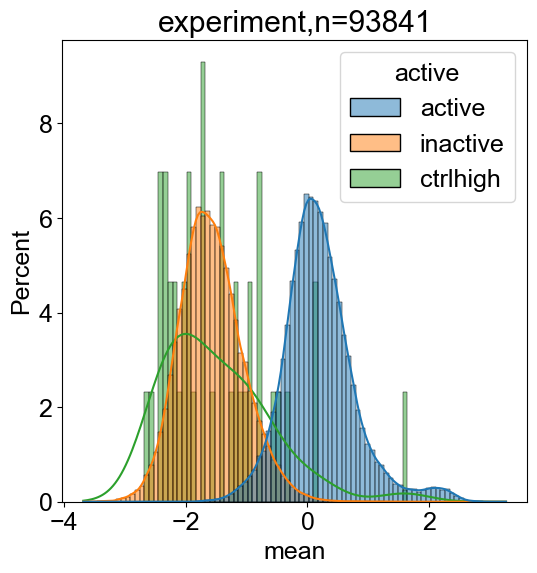

In [72]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(x="mean", hue = "active", 
             data=exp, #.sample(n=1000), 
             stat="percent", common_norm=False, 
             kde=True, ax=ax
            )
ax.set(title=f'experiment,n={exp.shape[0]}')
#ax.legend(bbox_to_anchor=(1,1), frameon=False)
out = os.path.join(RE, "exp.hist_active.pdf")

plt.savefig(out, bbox_inches="tight")